# env setting

In [ ]:
#cannot use cs298 env (I don't know why) 
#install all dependencies 
!pip install tensorflow
!pip install pandas
!pip install seaborn

In [135]:
import os
import tensorflow as tf
import glob
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# helper functions
## read file 

In [136]:
#helper function from read_result.py
#get Train_EnvstepsSoFar and Eval_AverageReturn

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':#train steps
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

## Collect outcomes of multiple different random seeds


(no need to use because sns can plot derectly )

In [137]:
'''

import os
from collections import defaultdict
import shutil 

#Collect return of multiple different random seeds by experiments name(prefix)

def average_results_of_seeds(prefix):
    
    data = defaultdict(dict) 
    data_diff_seeds = []
    
    
    for filename in os.listdir('data'): # list all files + directories in current folder
        if filename.startswith(prefix): # filter out files that start with specified prefix only
            print(filename) # found matched files

            # read each file 
            logdir = os.path.join('data', filename, 'events*')
            eventfile = glob.glob(logdir)[0] #retrieve files/pathnames matching a specified pattern
            X, data_this_seed  = get_section_results(eventfile)
   
            data_diff_seeds.append(data_this_seed)#append all the data
            
            # if the Experiment failed or interrupt, delete it
            if len(data_this_seed) < 10:
                print('remove this file',os.path.join('data', filename))
                shutil.rmtree(os.path.join('data', filename))

                
    #calculate mean and std over seeds
    data['return_mean'] = np.mean(data_diff_seeds, axis=0)
    data['return_std'] = np.std(data_diff_seeds, axis=0)
    #print('data',data)
    data = pd.DataFrame.from_dict(data)#transfrom to pd.DataFrame
    return data
'''

"\n\nimport os\nfrom collections import defaultdict\nimport shutil \n\n#Collect return of multiple different random seeds by experiments name(prefix)\n\ndef average_results_of_seeds(prefix):\n    \n    data = defaultdict(dict) \n    data_diff_seeds = []\n    \n    \n    for filename in os.listdir('data'): # list all files + directories in current folder\n        if filename.startswith(prefix): # filter out files that start with specified prefix only\n            print(filename) # found matched files\n\n            # read each file \n            logdir = os.path.join('data', filename, 'events*')\n            eventfile = glob.glob(logdir)[0] #retrieve files/pathnames matching a specified pattern\n            X, data_this_seed  = get_section_results(eventfile)\n   \n            data_diff_seeds.append(data_this_seed)#append all the data\n            \n            # if the Experiment failed or interrupt, delete it\n            if len(data_this_seed) < 10:\n                print('remove this

In [138]:
'''
#test example
data=average_results_of_seeds(prefix='q1_lb_no_rtg')
data
'''

"\n#test example\ndata=average_results_of_seeds(prefix='q1_lb_no_rtg')\ndata\n"

## read data for plot

In [145]:
#read data from multiple files by name with same prefix
import shutil

def read_data(prefix, env_name):
    full_data = pd.DataFrame()

    for filename in os.listdir('data'): # list all files + directories in current folder
        if filename.startswith(prefix): # filter out files that start with specified prefix(exp_name) only
            print(filename) # found matched files
            
            #____read file____
            logdir = os.path.join('data', filename, 'events*')#get the whole path of a specific file
            eventfile = glob.glob(logdir)[0] #retrieve files/pathnames matching a specified pattern
            X,Y = get_section_results(eventfile)#read data 
            
            # if the Experiment failed or interrupt(iteration less than 100), delete it
            if len(X) < 100:
                print('remove this file',os.path.join('data', filename))
                shutil.rmtree(os.path.join('data', filename))
            
            #____get experiment and seed name____ from filename. To automaticly generate plot legend 
            split = filename.split('_')#split folder name of experement data  
            
            if 'seed' in split:
                Exp_list = split[1:split.index('seed')]
                Exp = '_'.join(Exp_list) 
                #print('split',split)
                #print(Exp_list)
                #print('Exp',Exp)
                seed_list= split[split.index('seed'):split.index(env_name)]
                seed = '_'.join(seed_list) 
            else:
                Exp_list = split[1:split.index(env_name)]
                Exp = '_'.join(Exp_list) 
            
            
                
                
            
            
            #____create dataset____
            data = pd.DataFrame({'Iteration': range(len(X)), 
                                 'Experiment': np.repeat(Exp, len(X)),
                                 #'seed':np.repeat(seed,len(X)),
                                 'Train_EnvstepsSoFar': X, 
                                 'Eval_AverageReturn': Y})
            #data['Eval_AverageReturn_Smooth'] = data['Eval_AverageReturn'].ewm(alpha=0.6).mean()
            if 'seed' in split:
                data['seed']=np.repeat(seed,len(X))
            
        
            full_data = pd.concat([full_data, data], axis=0, ignore_index=True)
            full_data.head()
            
            
    return full_data


#test example
data_q1_lb= read_data(prefix='q1_lb',env_name= 'CartPole-v0')

q1_lb_no_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_3_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_0_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_na_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58


## Plot 

In [146]:
#set plot
figsize=(5.7, 3)
export_dir = os.path.join('solution', 'figures')

sns.set_theme()#seaborn  On later versions, it must be explicitly invoked.
sns.set_context("paper")
sns.set_style("whitegrid")

### Plot functions

In [147]:
#plot mean over different seeds 
'''
plot_std : a flag : plot std or not
'''

def plot_return(data_to_plot,fig_name, config, plot_std=False):
    plt.figure(figsize=figsize)
    if plot_std == True :
        sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn', 
                     hue= config, 
                     #style= config,
                     #size = config, 
                     ci="sd")
    else:
        sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn', 
                     hue= config, 
                     #style= config, 
                     #size= config, 
                     ci=None)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')

In [92]:
'''


#plot givn data and save figure
def plot_overseeds(data_to_plot,fig_name):
    plt.figure(figsize=figsize)
    sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn_overseeds_Smooth', hue='Experiment')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')
    
'''

"\n\n\n#plot givn data and save figure\ndef plot_overseeds(data_to_plot,fig_name):\n    plt.figure(figsize=figsize)\n    sns.lineplot(data=data_to_plot, x='Iteration', y='Eval_AverageReturn_overseeds_Smooth', hue='Experiment')\n\n    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\n    plt.savefig(os.path.join(export_dir, '{}.png'.format(fig_name)), bbox_inches='tight')\n    \n"

# Experiment 1

large batch
q1_lb_no_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_3_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_0_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_dsa_seed_3_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-59
q1_lb_no_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_na_seed_4_CartPole-v0_04-03-2021_16-50-59
q1_lb_rtg_na_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_no_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_lb_rtg_dsa_seed_0_CartPole-v0_04-03-2021_16-50-58
small batch
q1_sb_rtg_dsa_seed_1_CartPole-v0_04-03-2021_16-50-58
q1_sb_rtg_dsa_seed_4_CartPole-v0_04-03-2021_16-50-58
q1_sb_no_rtg_dsa_seed_2_CartPole-v0_04-03-2021_16-50-58
q1_sb_rtg

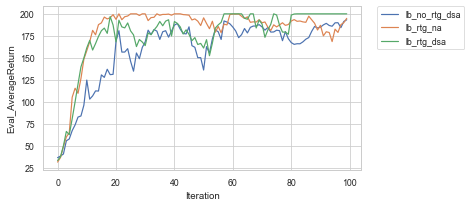

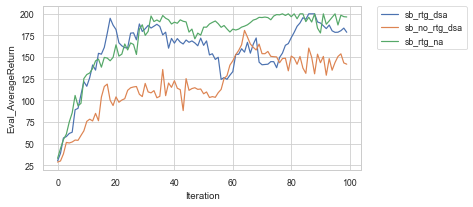

In [15]:
print('large batch')
data_q1_lb = read_data('q1_lb','CartPole-v0')
plot_return(data_q1_lb, 'q1_lb')

print('small batch')
data_q1_sb = read_data('q1_sb','CartPole-v0')
plot_return(data_q1_sb, 'q1_sb')

# helper funtions
## add colunms to pandas data

In [209]:
#add colunm

def data_add_column(my_str):
    splits = my_str.split("_")
    for split in splits:
        if split.startswith('b'):
            b = int(split[1:])
        if split.startswith('r0'): 
            lr = float(split[1:])
        
    new_col = (b,lr)

    return pd.Series(new_col)

#data_add_column('b300_r0.002') 



# Experiment 2

In [196]:


data_q2 = read_data('q2','InvertedPendulum-v2')
data_q2
#plot_return(data_q2, 'q2')


q2_b512_r0.03_seed_0_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b4096_r0.05_seed_1_InvertedPendulum-v2_08-03-2021_21-03-16
q2_b8192_r0.05_seed_0_InvertedPendulum-v2_08-03-2021_21-03-16
q2_b4096_r0.04_seed_0_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b2048_r0.03_seed_2_InvertedPendulum-v2_09-03-2021_08-42-15
q2_b512_r0.03_seed_1_InvertedPendulum-v2_09-03-2021_08-42-16
q2_b4096_r0.1_seed_2_InvertedPendulum-v2_08-03-2021_21-03-16
q2_b256_r0.06_seed_2_InvertedPendulum-v2_09-03-2021_08-42-16
q2_b512_r0.006_seed_1_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b256_r0.03_seed_0_InvertedPendulum-v2_09-03-2021_08-42-18
q2_b512_r0.006_seed_0_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b1024_r0.009_seed_0_InvertedPendulum-v2_09-03-2021_08-42-15
q2_b1024_r0.007_seed_0_InvertedPendulum-v2_09-03-2021_08-42-16
q2_b4096_r0.04_seed_1_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b256_r0.03_seed_1_InvertedPendulum-v2_09-03-2021_08-42-19
q2_b256_r0.009_seed_2_InvertedPendulum-v2_09-03-2021_08-42-17
q2_b1024_r0.

,Iteration,Experiment,Train_EnvstepsSoFar,Eval_AverageReturn,seed
0,0,b512_r0.03,516.0,27.200001,seed_0
1,1,b512_r0.03,1047.0,25.411764,seed_0
2,2,b512_r0.03,1589.0,16.320000,seed_0
3,3,b512_r0.03,2112.0,14.896552,seed_0
4,4,b512_r0.03,2640.0,11.500000,seed_0
...,...,...,...,...,...
17595,95,b4096_r0.01,441130.0,1000.000000,seed_2
17596,96,b4096_r0.01,446172.0,815.000000,seed_2
17597,97,b4096_r0.01,450511.0,670.000000,seed_2
17598,98,b4096_r0.01,454617.0,533.500000,seed_2


# speed 
## to reach largest return

In [200]:
#speed to reach largest return

#get the largest return
df = data_q2
idx = df.groupby(['Experiment'])['Eval_AverageReturn'].transform(max) == df['Eval_AverageReturn']
df[idx]

#get the first value of max return
df_first= df[idx].groupby('Experiment').first().reset_index()


#sort Experiments with largest return and smallest iteration

df_first = df_first.sort_values(["Eval_AverageReturn", "Iteration"], ascending = (False, True))
df_first= df_first.drop(columns=['Train_EnvstepsSoFar'])
df_first

,Experiment,Iteration,Eval_AverageReturn,seed
6,b1024_r0.05,13,1000.000000,seed_2
48,b512_r0.06,14,1000.000000,seed_0
49,b512_r0.08,14,1000.000000,seed_0
56,b8192_r0.04,14,1000.000000,seed_2
57,b8192_r0.05,15,1000.000000,seed_0
29,b256_r0.06,18,1000.000000,seed_1
11,b128_r0.05,23,1000.000000,seed_0
19,b2048_r0.06,23,1000.000000,seed_1
47,b512_r0.03,23,1000.000000,seed_0
37,b4096_r0.03,24,1000.000000,seed_1


In [100]:
print(df_first.to_latex(index=False)) 

\begin{tabular}{lrr}
\toprule
   Experiment &  Iteration &  Eval\_AverageReturn \\
\midrule
   b800\_r0.08 &         25 &         1000.000000 \\
  b1000\_r0.08 &         27 &         1000.000000 \\
   b500\_r0.01 &         57 &         1000.000000 \\
   b300\_r0.01 &         61 &         1000.000000 \\
  b1000\_r0.05 &         72 &         1000.000000 \\
   b300\_r0.02 &         85 &         1000.000000 \\
  b1000\_r0.07 &         92 &          260.500000 \\
 b10000\_r0.01 &         46 &          243.500000 \\
  b1000\_r0.09 &          9 &          197.333328 \\
  b10000\_r0.1 &         66 &          165.000000 \\
b10000\_r0.001 &         97 &          154.333328 \\
 b1000\_r0.001 &         97 &          154.333328 \\
  b1000\_r0.01 &         97 &          154.333328 \\
   b1000\_r0.1 &         97 &          154.333328 \\
   b500\_r0.08 &         37 &          101.250000 \\
  b100\_r0.001 &         76 &           90.000000 \\
   b100\_r0.01 &         76 &           90.000000 \\
    b10

In [226]:
#add column for config
data_q2[["batch size", "learning rate"]] = data_q2["Experiment"].apply(data_add_column)



# the number of iteration in which average return > threshold

In [242]:

def get_num_iteration(data, threshold):
    
    df_over_threshold=data
    
    result = df_over_threshold.assign(return_over_threshold=df.Eval_AverageReturn.ge(threshold))
    
    result =result.groupby('Experiment').agg({'return_over_threshold': 'sum'}).astype(int).reset_index()


    result= result.sort_values("return_over_threshold", ascending = False)
    
    #add column for config
    result[["batch size", "learning rate"]] = result["Experiment"].apply(data_add_column)



    result
    return result

df_over_threshold = get_num_iteration(data_q2, threshold=900)
df_over_threshold





,Experiment,return_over_threshold,batch size,learning rate
37,b4096_r0.03,156,4096.0,0.030
55,b8192_r0.01,152,8192.0,0.010
36,b4096_r0.01,145,4096.0,0.010
57,b8192_r0.05,141,8192.0,0.050
17,b2048_r0.03,132,2048.0,0.030
34,b4096_r0.008,116,4096.0,0.008
35,b4096_r0.009,115,4096.0,0.009
33,b4096_r0.007,113,4096.0,0.007
38,b4096_r0.04,110,4096.0,0.040
16,b2048_r0.009,110,2048.0,0.009


In [191]:
#find smalest bs and largest lr
df_hyper_optimal = df_hyper_optimal.sort_values(["batch size", "learning rate"], ascending = (True,False))

df_hyper_optimal= df_hyper_optimal.drop(columns=['Train_EnvstepsSoFar'])
df_hyper_optimal

NameError: name 'df_hyper_optimal' is not defined

In [192]:



#compare with fixed batch size or learning rate

def hyper_fix_bs(bs):
    #fix batch size
    hyper_compare_name = "bs_{}".format(bs)
    print(hyper_compare_name)

    hyper_compare_data = df.loc[data_q2['batch size'] == bs]
    
    hyper_compare_data.to_csv(os.path.join(export_dir, 'q2_{}.csv'.format(hyper_compare_name)), index = False)

    hyper_compare_data['learning rate'] = 'lr' + hyper_compare_data['learning rate'].astype(str)# add string prefix to make the plot hue clear
    plot_return(hyper_compare_data, 'q2_{}.format(hyper_compare_name)', config = 'learning rate')

def hyper_fix_lr(lr):
    #fix learning rate
    hyper_compare_name = "lr_{}".format(bs)

    hyper_compare_data = df.loc[data_q2['learning rate'] == lr]
    #hyper_compare_name.to_csv(r'export_dir\{}.csv'.format(hyper_compare_name), index = False)

    hyper_compare_data['batch size'] = 'b' + hyper_compare_name['batch size'].astype(str)# add string prefix to make the plot hue clear
    plot_return(hyper_compare_data, 'q2_{}.format(hyper_compare_name)', config = 'batch size')




bs_1024


<ipython-input-157-fe0685b3cb51>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyper_compare_data['learning rate'] = 'lr' + hyper_compare_data['learning rate'].astype(str)# add string prefix to make the plot hue clear


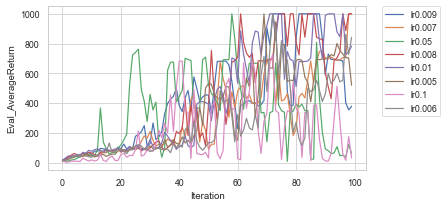

In [158]:
hyper_fix_bs(1024)

### optimal hyper

q2_b300_r0.01_InvertedPendulum-v2_24-02-2021_12-12-52


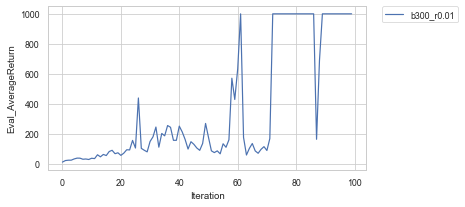

In [574]:
data_q2_optimal = read_data('q2_b300_r0.01','InvertedPendulum-v2')
plot_return(data_q2_optimal, 'q2_optimal')

# Experiment 4

q4_serach_b30000_lr0.02_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b10000_lr0.005_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-03
q4_serach_b10000_lr0.02_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b30000_lr0.005_rtg_nnbaseline_seed_2_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.02_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-05
q4_serach_b30000_lr0.01_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b30000_lr0.005_rtg_nnbaseline_seed_4_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.01_rtg_nnbaseline_seed_3_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b10000_lr0.01_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.005_rtg_nnbaseline_seed_1_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b30000_lr0.02_rtg_nnbaseline_seed_2_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b10000_lr0.005_rtg_nnbaseline_seed_2_HalfCheetah-v2_04-03-2021_20-18-04
q4_serach_b50000_lr0.02

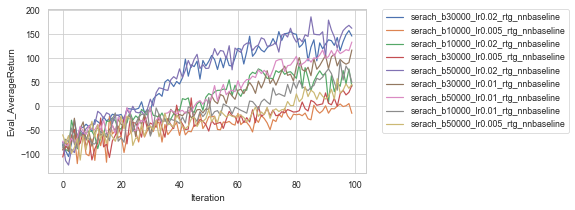

In [557]:
data_q4_serach = read_data('q4_serach','HalfCheetah-v2')
plot_return(data_q4_serach, 'q4_serach')

q4_b50000_lr0.02_seed_2_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_nnbaseline_seed_0_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_seed_4_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_rtg_seed_0_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_nnbaseline_seed_0_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_seed_3_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_nnbaseline_seed_1_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_seed_1_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_nnbaseline_seed_1_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_rtg_nnbaseline_seed_4_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_rtg_seed_4_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_seed_0_HalfCheetah-v2_05-03-2021_11-19-34
q4_b50000_lr0.02_nnbaseline_seed_2_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_nnbaseline_seed_4_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_lr0.02_rtg_seed_2_HalfCheetah-v2_05-03-2021_13-43-37
q4_b50000_

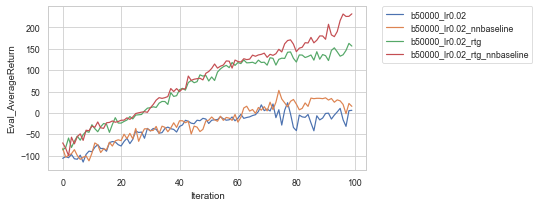

In [558]:
data_q4_optimal = read_data('q4_b','HalfCheetah-v2')
plot_return(data_q4_optimal, 'q4_b')

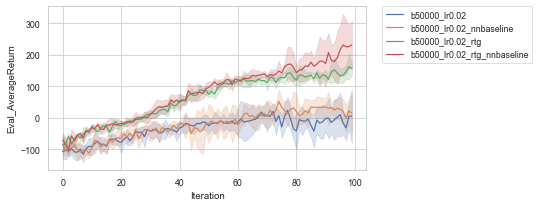

In [575]:
plot_return(data_q4_optimal, 'q4_optimal_with_std',plot_std=True)

# Experiment 3

q3_b40000_r0.005_LunarLanderContinuous-v2_25-02-2021_09-01-56


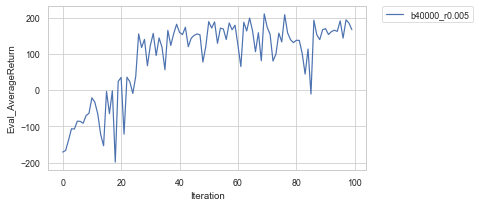

In [559]:
data_q3 = read_data('q3','LunarLanderContinuous-v2')
plot_return(data_q3, 'q3')